In [16]:
import pandas as pd
import numpy as np
import math
import datetime as dt
import scipy
%matplotlib inline
#import matplotlib as mpl
#mpl.use('pgf')
import matplotlib
matplotlib.style.use('ggplot')

import matplotlib.pyplot as plt
import scipy.stats as stats

data = './data/data/improved-dataset/turnstile_weather_v2.csv'
df = pd.read_csv(data)

In [2]:
def SubPlot(ax, title, Ymax):
    ax.set_xlabel("Hourly Ridership", fontsize = 11)
    ax.set_ylabel("Frequency", fontsize = 11)
    ax.set_title(title)
    plt.sca(ax)
    plt.xticks(rotation=-90)
    
    dytick = 0.00004
    yticks = math.ceil(Ymax/dytick)
    
    ax.set_ylim(ymin=0,ymax = Ymax)
    ax.set_yticks([ i * dytick for i in range(yticks) ])

In [3]:
rainy = df[df.rain == 1]['ENTRIESn_hourly']
norain = df[df.rain == 0]['ENTRIESn_hourly']
rainy_cutoff = rainy.describe(percentiles=[.95])[5]
norain_cutoff = norain.describe(percentiles=[.95])[5]
cutoff = max(rainy_cutoff, norain_cutoff)

# instead of truncating x-axis remove outliers, using 95% cutoff:
rainy = rainy[rainy < cutoff].values
norain = norain[norain < cutoff].values

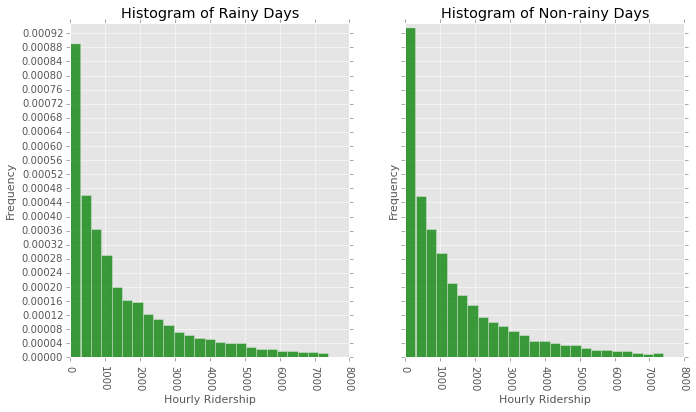

In [4]:
# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(
    1, 
    2, 
    sharey=True,
    sharex=True,
    figsize=(11, 6), 
    dpi=300, 
    facecolor='w', 
    edgecolor='k'
)

titleR = 'Histogram of Rainy Days'
n, bins, patches = ax1.hist(rainy, 
                            bins = 25, 
                            normed = 1, 
                            facecolor='green', 
                            alpha=0.75
                           )

titleNR = 'Histogram of Non-rainy Days'
n, bins, patches = ax2.hist(norain, 
                            bins = 25, 
                            normed = 1, 
                            facecolor='green', 
                            alpha=0.75
                           )

#ax1.set_title('Histogram of Rainy Days')
#ax2.set_title('Histogram of non-Rainy Days')

# as x,y-axes are shared set only ax1 will set both:

Ymax = 0.00095
ax1.set_ylim([0,Ymax])

SubPlot(ax1,titleR, Ymax) 
SubPlot(ax2,titleNR, Ymax)
    
plt.savefig('histogram-rainy-norain.pdf')

In [5]:
# I'm sure str(f|p)time can do this more efficiently, but manual here we go:
days = { 
    0:'Monday',
    1:'Tuesday',
    2:'Wednesday',
    3:'Thursday',
    4:'Friday',
    5:'Saturday',
    6:'Sunday'
}
day_names = list(days.values())

In [6]:
days_rain = pd.DataFrame(columns = ['rain','no-rain'] , index= day_names)

In [7]:
for i in df.day_week.unique():
    for j in df.rain.unique():
        days_rain.iloc[i,j] = df[ ( df.day_week == i ) & ( df.rain == j ) ]['ENTRIESn_hourly'].sum()

ax1.hist(
    x, 
    alpha=1,
    bins = 45,
    normed = 1,
    label='Histogram of Rainy Days'
)

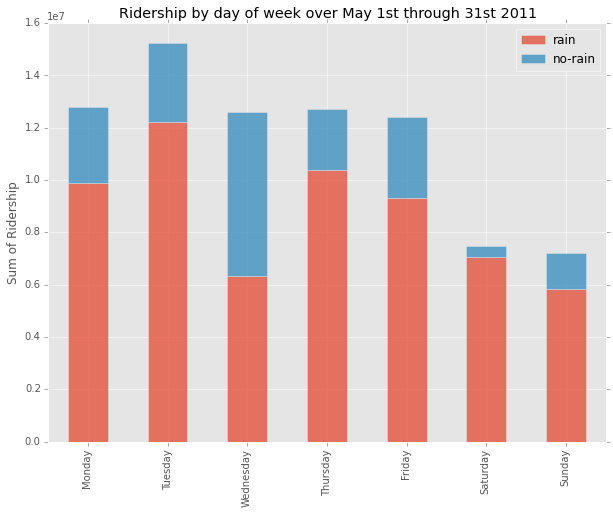

In [12]:
days_rain = days_rain.astype(float)
#plt.gcf().subplots_adjust(bottom=0.5)
barDays = days_rain.plot(
    kind = 'bar', 
    stacked = True, 
    alpha = 0.75,
    figsize  = (10,7.5)
)
barDays.set_title('Ridership by day of week over May 1st through 31st 2011')
barDays.set_ylabel('Sum of Ridership')
fig = barDays.get_figure()
fig.savefig('bar-days-of-week-rainy.pdf')


In [19]:
rainy = df[df.rain == 1]['ENTRIESn_hourly']
norain = df[df.rain == 0]['ENTRIESn_hourly']

print(rainy.mean())
print(norain.mean())

rainy_cutoff = rainy.describe(percentiles=[.98])[5]
norain_cutoff = norain.describe(percentiles=[.98])[5]

# instead of truncating x-axis remove outliers, using 95% cutoff:
rainy = rainy[rainy < rainy_cutoff]
norain = norain[norain < norain_cutoff]

print(rainy.mean())
print(norain.mean())

rainy = df[df.rain == 1]['ENTRIESn_hourly']
norain = df[df.rain == 0]['ENTRIESn_hourly']

rain_sum = rainy.sum()
nonrain_sum = norain.sum()

print(rainy.sum(),norain.sum())

2028.19603547
1845.53943866
1701.10986905
1551.04237393
19440259.0 61020916.0


In [ ]:

fig = plt.figure(num=None, 
                 figsize=(10, 5), 
                 dpi=300, 
                 facecolor='w', 
                 edgecolor='k'
                )

ax1 = fig.add_subplot(121)
titleR = 'Histogram of Rainy Days'
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xticks( rotation = -90 )
histRainy = df[df.rain == 1].ENTRIESn_hourly.plot(kind='hist', 
                                      alpha=1,
                                      bins = 45,
                                      normed = 1,
                                      label='Histogram of Rainy Days'
                                     )

ax2 = fig.add_subplot(122)
titleNR = 'Histogram of Non-rainy Days'
plt.tick_params(axis='both', which='major', labelsize=8)

histNoRain = df[df.rain == 0].ENTRIESn_hourly.plot(kind='hist', 
                                      alpha=0.5,
                                      bins = 45,
                                      normed = 1,
                                      label='Histogram of Non-Rainy Days'
                                     )
SubPlot(ax1,titleR) 
SubPlot(ax2,titleNR)
    
plt.tight_layout()
plt.savefig('histogram-rainy-norain.pdf')

```python
pgf_with_lualatex = {
    "text.usetex": True,
    "pgf.rcfonts": False,   # Do not set up fonts from rc parameters.
    "pgf.texsystem": "lualatex",
    "pgf.preamble": [
        r'\usepackage{verbatim}',
        r'\usepackage{newtxmath}',
        r'\usepackage[T1]{fontspec}',
        r'\usepackage{newtxtext}',
    ]
}
mpl.rcParams.update(pgf_with_lualatex)

# Auto-setting Y-ticks based off of desired frequency
    # construct y,x-ticks, axis labels for histograms:
    # construct y-ticks:
    Ymax = 0.00062
    dytick = 0.00004
    yticks = math.ceil(Ymax/dytick)
    
    ax.set_ylim(ymin=0,ymax = Ymax)
    ax.set_yticks([ i * dytick for i in range(yticks) ])
    ax.set_xlim(xmin=0,xmax=15000)
```

In [ ]:
normRain = df[df.rain == 1].ENTRIESn_hourly.count()
normNonRain = df[df.rain == 0].ENTRIESn_hourly.count()
print(normRain,normNonRain)

Ymax = 0.00062
dtick = 0.00002
ticks = math.ceil(Ymax/tick) + 1

In [ ]:
# nice pseudo-transparent legend: 
#leg = plt.legend(loc=1,fancybox=True, fontsize=14)
#leg.get_frame().set_alpha(0.5)

#plt.ylabel('number of occurrences')
#plt.title('Histograms Rainy vs Non-rainy Days')

plt.figure();
plt.xlabel('ENTRIESn_hourly')
#plt.ylabel('Number of occurences')
plt.title('Histogram of ENTRIESn_hourly')

#plt.ylim(0,100)
histo = df.ENTRIESn_hourly.sort(inplace = False)
fit = stats.norm.pdf(histo,histo.mean(),histo.std())
plt.plot(histo,fit,'-o')

df.ENTRIESn_hourly.hist(alpha=0.5,normed=True, bins=40)
plt.savefig('histogram_entries.pdf')

In [ ]:
stats.mstats.normaltest(histo)

In [ ]:
import scipy
p_shapiro = scipy.stats.shapiro(df.ENTRIESn_hourly);
p_dandp = scipy.stats.mstats.normaltest(df.ENTRIESn_hourly);
print(p_shapiro,p_dandp)
print(scipy.stats.ks_2samp(weekends,weekdays),'\n',\
      scipy.stats.mannwhitneyu(weekends,weekdays))

In [23]:
rain = df[df.rain == 1]['ENTRIESn_hourly']
norain = df[df.rain == 0]['ENTRIESn_hourly']
ks_stat = scipy.stats.ks_2samp(rainy,norain)
p_KS = 'The p-value using the one sided Kolmogorov-Smirnov test is:'
D_KW = 'The D-value using the one sided Kolmogorov-Smirnov test is:'
p_MW = 'The p-value using the one sided Mann-Whitney test is:'
mean_rainy = 'The mean ENTRIESn_hourly for rainy days is:'
mean_norain = 'The mean ENTRIESn_hourly for non-rain days is:'

print(p_KS, ks_stat[1], \
      '\n' + D_KW, ks_stat[0], \
      '\n' + p_MW, scipy.stats.mannwhitneyu(rainy,norain)[1], \
      '\n' + mean_rainy, rainy.mean(), \
      '\n' + mean_norain, norain.mean())

The p-value using the one sided Kolmogorov-Smirnov test is: 1.42662617869e-05 
The D-value using the one sided Kolmogorov-Smirnov test is: 0.0281986431588 
The p-value using the one sided Mann-Whitney test is: 2.74106957124e-06 
The mean ENTRIESn_hourly for rainy days is: 2028.19603547 
The mean ENTRIESn_hourly for non-rain days is: 1845.53943866


In [ ]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
df[df.rain == 1].ENTRIESn_hourly.plot(kind='hist', 
                                      alpha=1,
                                      bins = 45,
                                      label='Histogram of Rainy Days'
                                     )
df[df.rain == 0].ENTRIESn_hourly.plot(kind='hist', 
                                      alpha=0.5,
                                      bins = 45,
                                      label='Histogram of Rainy Days'
                                     )
leg = plt.legend(loc=2,fancybox=True, fontsize=14)
leg.get_frame().set_alpha(0.5)

#plt.xlabel('\verb|ENTRIESn_hourly|')
plt.ylabel('number of occurrences')
plt.title('Histograms Rainy vs Non-rainy Days')
plt.ylim(ymin=0,ymax=10000)
plt.xlim(xmin=0,xmax=15000)

In [ ]:
( 1500/40 + 25 + 30 ) * 2

In [14]:
df.wspdi.mean()

6.9278716968744867